## 1. Discussion and Background of the Business Problem:
Problem Statement: Prospects of a Restaurant, Close to Office Areas in Shanghai, China.
<br>
<br>During the peak dinning time, office areas provide huge opportunities for restaurants. Usually the profit margin for a decent restaurant lie within 15−20% range but, it can even go high enough to 35%, as discussed here. Shanghai is made of 16 districts but, I will later concentrate on 8 most busiest business districts  —  Jing'an District(静安区), Huangpu District(黄浦区), Xuhui District(徐汇区), Changning District(长宁区), Pudong New Area(浦东新区), Hongkou District(虹口区), Putuo District(普陀区), Yangpu District(杨浦区)
<br>
<br>We will go through each step of this project and address them separately. I first outline the initial data preparation and describe future steps to start the battle of neighborhoods in Shanghai.
<br>
<br>__Target Audience__
<br>
<br>What type of clients or a group of people would be interested in this project?
<br>
- Business personnel who wants to invest or open a restaurant. This analysis will be a comprehensive guide to start or expand restaurants targeting the large pool of office workers in Tokyo during lunch hours.
- Freelancer who loves to have their own restaurant as a side business. This analysis will give an idea, how beneficial it is to open a restaurant and what are the pros and cons of this business.
- New graduates, to find reasonable lunch/breakfast place close to office.
- Budding Data Scientists, who want to implement some of the most used Exploratory Data Analysis techniques to obtain necessary data, analyze it, and, finally be able to tell a story out of it.

In [161]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


# 2. Data Preparation:
## 2.1. Extract data from Wikipedia
I used the list of the administrative districts in Shanghai as my original start, which come from Wikipedia (https://en.wikipedia.org/wiki/List_of_administrative_divisions_of_Shanghai). The data was just extracted and saved. The data was shown as below.

In [229]:
path=r'C:\Users\songy\Desktop\projects\Coursera_Capstone\Foursquare_prj\Shanghai_district_info_CN.csv'
df=pd.read_csv(path)
df

,Neighborhood,Chinese,Division code,Area_SqKm,Population,Density_pSqKm
0,Huangpu District,黄浦区,310101,20.46,"658,600","32,190"
1,Xuhui District,徐汇区,310104,54.76,"1,089,100","19,889"
2,Changning District,长宁区,310105,38.3,"691,100","18,044"
3,Jing'an District,静安区,310106,37.37,"1,000,000","27,000"
4,Putuo District,普陀区,310107,54.83,"1,288,000","23,491"
5,Hongkou District,虹口区,310109,23.46,"809,400","34,501"
6,Yangpu District,杨浦区,310110,60.73,"1,315,200","21,657"
7,Minhang District,闵行区,310112,370.75,"2,537,900","6,845"
8,Baoshan District,宝山区,310113,270.99,"2,022,900","7,465"
9,Jiading District,嘉定区,310114,464.2,"1,568,231","3,378"


## 2.2 Getting Coordinates of Major Districts
Here it should be mentioned that the geopy package was first applied to get the geology information, however, after the data was visualized in the map, it indicates that the geology location was not accurate. In order to resovle this issue, I chose baidu map api to get the geology information which is a Chinese Map APP, and the results seem like more reasonable than previous API. The code was shown as below.

In [230]:
import json
from urllib.request import urlopen, quote
import requests
def getlnglat(address):
    url = 'http://api.map.baidu.com/geocoder/v2/'
    output = 'json'
    ak = 'kEeGBNLRCPUMjG3k2qn8VXsFLaiWwggi' # Baidu map key
    address = quote(address) # Because the address here is Chinese, so need to code
    uri = url + '?' + 'address=' + address  + '&output=' + output + '&ak=' + ak 
    req = urlopen(uri)
    res = req.read().decode() 
    temp = json.loads(res)
    lat = temp['result']['location']['lat']
    lng = temp['result']['location']['lng']
    return lat,lng   # latitude   ，   longitude  ，

path=r'C:\Users\songy\Desktop\projects\Coursera_Capstone\Foursquare_prj\Shanghai_district_info_CN.csv'
df=pd.read_csv(path)
latitude_list=[]
longitude_list=[]
for item in df['Chinese']:
    address = '中国 上海市 '+ item
    latitude,longitude=getlnglat(address)
    latitude_list.append(latitude)
    longitude_list.append(longitude)
    
df['latitude']=latitude_list
df['longitude']=longitude_list
df.to_csv(r'C:\Users\songy\Desktop\projects\Coursera_Capstone\Foursquare_prj\Shanghai_district_info_baidugeo.csv')
df

,Neighborhood,Chinese,Division code,Area_SqKm,Population,Density_pSqKm,latitude,longitude
0,Huangpu District,黄浦区,310101,20.46,"658,600","32,190",31.237247,121.491586
1,Xuhui District,徐汇区,310104,54.76,"1,089,100","19,889",31.194557,121.443396
2,Changning District,长宁区,310105,38.3,"691,100","18,044",31.226848,121.430454
3,Jing'an District,静安区,310106,37.37,"1,000,000","27,000",31.233845,121.453432
4,Putuo District,普陀区,310107,54.83,"1,288,000","23,491",31.254973,121.403569
5,Hongkou District,虹口区,310109,23.46,"809,400","34,501",31.269747,121.511586
6,Yangpu District,杨浦区,310110,60.73,"1,315,200","21,657",31.265524,121.532520
7,Minhang District,闵行区,310112,370.75,"2,537,900","6,845",31.118843,121.388612
8,Baoshan District,宝山区,310113,270.99,"2,022,900","7,465",31.410279,121.496563
9,Jiading District,嘉定区,310114,464.2,"1,568,231","3,378",31.380155,121.272595


In [162]:
SH_lati, SH_longti=getlnglat('中国 上海')
map_Shanghai = folium.Map(location=[SH_lati, SH_longti], zoom_start=10)

# add markers to map
for lat, lng, name in zip(df['latitude'], df['longitude'], df['Neighborhood']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Shanghai)  
    
map_Shanghai

### 2.3 Average Rent Price in Districts of Shanghai
As mentioned in the beginning, the office area are always with high opptunities for restaruants,since the peak dinning hour. And this area always has a hihger rent price, which is a good factor that can guide us to decide which district would be beter to open a restaurant.
<br>
<br>Since there is a no website to provide compile data, I collect the information of every districts in the 'creprice' website, which has a latest rent price of different districts.(Ack. http://www.creprice.cn/district/BS.html?city=sh&type=lease&proptype=22) The rent price was compiled into the list of Shanghai districts. The 8 of the most higher price districts were selected which considered as the busiest business area, the data was shown as below.It should be noted that "Avergae_Rent_RMBpDpSqm" means Average rent per day per square in RMB.

In [95]:
Sh_dist=df.sort_values('Avergae_Rent_RMBpDpSqm',ascending=False).iloc[:8,:].reset_index(drop=True)
Sh_dist

,Neighborhood,Chinese,Division code,Area_SqKm,Population,Density_pSqKm,Avergae_Rent_RMBpDpSqm,latitude,longitude
0,Jing'an District,静安区,310106,37.37,"1,000,000","27,000",13.64,31.233845,121.453432
1,Huangpu District,黄浦区,310101,20.46,"658,600","32,190",13.58,31.237247,121.491586
2,Xuhui District,徐汇区,310104,54.76,"1,089,100","19,889",11.24,31.194557,121.443396
3,Changning District,长宁区,310105,38.3,"691,100","18,044",10.10,31.226848,121.430454
4,Pudong New Area,浦东新区,310115,"1,210.41","5,474,900","4,523",8.77,31.227348,121.550455
5,Hongkou District,虹口区,310109,23.46,"809,400","34,501",8.50,31.269747,121.511586
6,Putuo District,普陀区,310107,54.83,"1,288,000","23,491",8.43,31.254973,121.403569
7,Yangpu District,杨浦区,310110,60.73,"1,315,200","21,657",8.22,31.265524,121.532520


### 2.4 Using Foursquare API to find the location data
For this business problem I have used, as a part of the assignment, the Foursquare API to retrieve information about the popular spots around these 7 districts in Shanghai.
The call returns a JSON file and we need to turn that into a dataframe. Here I’ve chosen 100 nearby spots for each major districts within a radius of 3 km. Below is the progress that I retrieve the information and dataframe obtained from the JSON file that was returned by Foursquare

In [7]:
CLIENT_ID = '3X2RVRREEVZCDF0SYJOZVZOWBVKITBXK3W1FDMMS4MSZ102K' # your Foursquare ID
CLIENT_SECRET = 'DGQAGTEKQWCZIQBRMF0BF3L1N2RARU2WU4ZQUC2S5K5PCIDW' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3X2RVRREEVZCDF0SYJOZVZOWBVKITBXK3W1FDMMS4MSZ102K
CLIENT_SECRET:DGQAGTEKQWCZIQBRMF0BF3L1N2RARU2WU4ZQUC2S5K5PCIDW


In [12]:
def getNearbyVenues(names, latitudes, longitudes, radius=3000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        print(lat,lng)    
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
#         print(results)
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [13]:
LIMIT=100
Shanghai_venues = getNearbyVenues(names=Sh_dist['Neighborhood'],
                                   latitudes=Sh_dist['latitude'],
                                   longitudes=Sh_dist['longitude'])

Jing'an District
31.233844930401652 121.45343177276851
Huangpu District
31.23724715206362 121.49158559252436
Xuhui District
31.194556772822725 121.44339635276381
Changning District
31.226847968225428 121.43045437545099
Pudong New Area
31.227348292436346 121.55045460683195
Hongkou District
31.269746698931357 121.51158645453457
Putuo District
31.254973368279597 121.40356934916508
Yangpu District
31.265524144657057 121.53251993732523


In [231]:
Shanghai_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Jing'an District,31.233845,121.453432,The McKinnon Hotel (麦金侬酒店),31.232025,121.451283,Theater
1,Jing'an District,31.233845,121.453432,Starbucks Reserve Roastery (星巴克臻选),31.232402,121.457684,Coffee Shop
2,Jing'an District,31.233845,121.453432,Haidilao Hot Pot (海底捞火锅),31.232055,121.450242,Hotpot Restaurant
3,Jing'an District,31.233845,121.453432,Din Tai Fung (鼎泰丰),31.230923,121.458491,Dumpling Restaurant
4,Jing'an District,31.233845,121.453432,Rooster 2,31.232447,121.448274,Sports Bar


## 3. Visualization and Data Exploration:
### 3.1. Folium Library and Leaflet Map:
Folium is a python library that can create interactive leaflet map using coordinate data. Before we further explore the restaurant information,I want to show restaurants location in these 8 districts and the spots related to the restaurants were selected out based on the 'Venue Category'. Since some spots are restaurants but without a 'restaurant' in 'Venue Category' text, I maually selected out the relevant categories and shown as below.

In [61]:
Shanghai_venues[~Shanghai_venues['Venue Category'].str.contains('Restaurant')]['Venue Category'].unique()

array(['Theater', 'Coffee Shop', 'Sports Bar', 'History Museum', 'Spa',
       'Bakery', 'Historic Site', 'Sculpture Garden', 'Sports Club',
       'Shopping Mall', 'Supermarket', 'Hotel', 'Pizza Place',
       'Gym / Fitness Center', 'Sandwich Place', 'Other Nightlife',
       'Cocktail Bar', 'Bar', 'Lounge', 'Burger Joint', 'Bistro',
       'Wine Bar', 'Multiplex', 'Massage Studio', 'Park', 'Video Store',
       'Martial Arts Dojo', 'Smoothie Shop', 'Hotel Bar', 'Optical Shop',
       'Department Store', 'Tailor Shop', 'Diner', 'Buddhist Temple',
       'Wine Shop', 'Club House', 'Café', 'Noodle House', 'Nail Salon',
       'Furniture / Home Store', 'Scenic Lookout', 'Waterfront',
       'Electronics Store', 'Salad Place', 'Monument / Landmark',
       'Taco Place', 'BBQ Joint', 'Jazz Club', 'Roof Deck', 'Steakhouse',
       'Garden', 'Art Gallery', 'Gym', 'Nightclub', 'Toy / Game Store',
       'Deli / Bodega', 'Bookstore', 'Yoga Studio', 'Cha Chaan Teng',
       'Art Museum', 'Crep

In [233]:
Restaurant_relevant_category='Restaurant|Sandwich Place|Diner|Noodle House|Salad Place|BBQ Joint|Steakhouse|Pie Shop|Buffet'
Shanghai_dist_venues_restaurant=Shanghai_venues[Shanghai_venues['Venue Category'].\
                                                str.contains(Restaurant_relevant_category)].reset_index(drop=True)
Shanghai_dist_venues_restaurant.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Jing'an District,31.233845,121.453432,Haidilao Hot Pot (海底捞火锅),31.232055,121.450242,Hotpot Restaurant
1,Jing'an District,31.233845,121.453432,Din Tai Fung (鼎泰丰),31.230923,121.458491,Dumpling Restaurant
2,Jing'an District,31.233845,121.453432,Bella Napoli,31.232035,121.452144,Italian Restaurant
3,Jing'an District,31.233845,121.453432,Little Catch,31.230686,121.455385,Hawaiian Restaurant
4,Jing'an District,31.233845,121.453432,The Commune Social,31.237737,121.446326,Tapas Restaurant
5,Jing'an District,31.233845,121.453432,Din Tai Fung (鼎泰丰),31.228910,121.446261,Dumpling Restaurant
6,Jing'an District,31.233845,121.453432,Yang's Fried Dumplings (小杨生煎),31.231138,121.454217,Dumpling Restaurant
7,Jing'an District,31.233845,121.453432,Jujube Tree (Vegetarian Life Style) (枣子树),31.231582,121.452379,Vegetarian / Vegan Restaurant
8,Jing'an District,31.233845,121.453432,Din Tai Fung (鼎泰丰),31.225414,121.445007,Dim Sum Restaurant
9,Jing'an District,31.233845,121.453432,Dong Lai Shun (东来顺饭庄),31.236227,121.455970,Chinese Restaurant


Based on the dataframe, a leaflet map with Folium is created to see the distribution of the 8 districts. Circular marks represent the relevant restaurants in the 7 Districts (Putuo - Orange,Changning - Cyan,Xuhui - Light Blue, Jing'an - Purple, Huangpu - Blue, Hongkou - Light Yellow,Yangpu - Red, Pudong New Area - Green ) districts of Shanghai, according to Foursquare data.
<br>
<br>It is easy to see that the density of restaurants in Changning Xuhui, Jing'an and Huangpu districts is much higher than the rest districts.

In [262]:
# Create map
map_shanghai_restaurants = folium.Map(location=[SH_lati, SH_longti], zoom_start=12)

# set color scheme for the clusters
dist = Sh_dist['Neighborhood'].values.tolist()
colors_array = cm.rainbow(np.linspace(0, 1, len(dist)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, district in zip(Shanghai_dist_venues_restaurant['Venue Latitude'], Shanghai_dist_venues_restaurant['Venue Longitude'], \
                                  Shanghai_dist_venues_restaurant['Venue'], Shanghai_dist_venues_restaurant['Neighborhood']):
    label = folium.Popup(str(district).split( )[0]+'-'+str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[dist.index(district)],
        fill=True,
        fill_color=rainbow[dist.index(district)],
        fill_opacity=0.7).add_to(map_shanghai_restaurants)
       
map_shanghai_restaurants

### 3.2. Exploratory Data Analysis:
Let's explore more details of these restaruants, after the analysis we can conclude:
- There are 53 unique restaurant categories in the 8 districts
- In these unique restaurant categories, Chinese Restaurants are the most popular categories.
- Except Chinese Restaurants, some Chinese traditional restaurants such as dumpling and hotpot restaurants are also in the list

There are 203 unique restaurant catogaries in the 8 districts


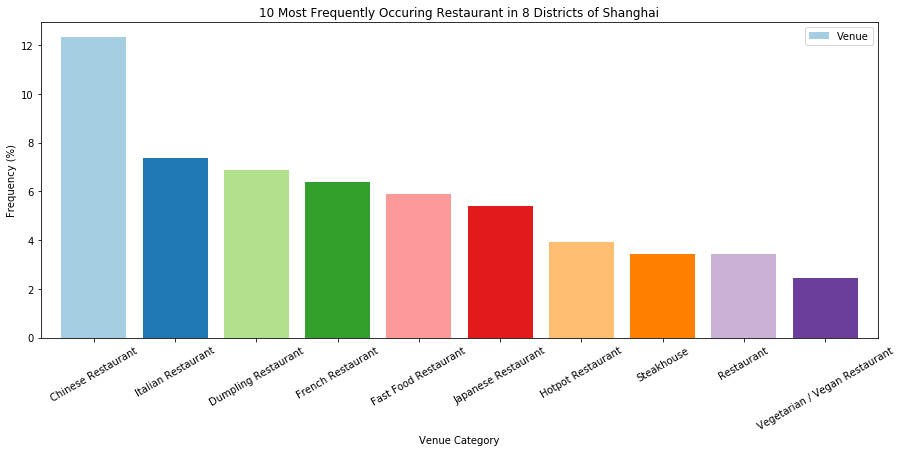

In [247]:
num_retaurant_categories=Shanghai_dist_venues_restaurant['Venue'].count()
print('There are {} unique restaurant catogaries in the 8 districts'\
                        .format(num_retaurant_categories))
Venue_Category_overview=Shanghai_dist_venues_restaurant.groupby('Venue Category').count().\
                         sort_values('Venue',ascending=False).iloc[:10,:].reset_index().loc[:,['Venue Category','Venue']]

Venue_Category_overview['Venue']=Venue_Category_overview['Venue']/num_retaurant_categories*100

Venue_Category_overview.plot.bar(x='Venue Category',y='Venue',figsize=(15,5.8),\
                                 color=plt.cm.Paired(np.arange(len(Venue_Category_overview))),width=0.8,rot=30)
plt.xlabel('Venue Category')
plt.ylabel(r'Frequency (%)')
plt.title('10 Most Frequently Occuring Restaurant in 8 Districts of Shanghai')
plt.show()

After have a roughly understanding of the venues, let’s get back to exploring the data a little more. To know about the top 5 venues of each district we proceed as follows

- Create a dataframe with pandas one hot encoding for the venue categories.
- Use pandas groupby on the District column and obtain the mean of the one-hot encoded venue categories.
- Transpose the data-frame at step 2 and arrange in descending order.
Let’s see the code below

In [219]:
Shanghai_venues_onehot=pd.get_dummies(Shanghai_venues[['Venue Category']],prefix="",prefix_sep="")
Shanghai_venues_onehot['District'] = Shanghai_venues['Neighborhood']
Shanghai_venues_onehot=Shanghai_venues_onehot[Shanghai_venues_onehot.columns.tolist()[-1:]+\
                                                        Shanghai_venues_onehot.columns.tolist()[:-1]]

Shanghai_venues_grouped=Shanghai_venues_onehot.groupby('District').mean().reset_index()
Shanghai_venues_grouped.index=np.arange(1,len(Shanghai_venues_grouped)+1)
Shanghai_venues_grouped.head(7)

,District,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Bar,Bistro,Boat or Ferry,Bookstore,Brazilian Restaurant,Breakfast Spot,Buddhist Temple,Buffet,Burger Joint,Café,Cantonese Restaurant,Cha Chaan Teng,Chinese Breakfast Place,Chinese Restaurant,Clothing Store,Club House,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Creperie,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dongbei Restaurant,Dumpling Restaurant,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Flower Shop,French Restaurant,Furniture / Home Store,Garden,Gastropub,German Restaurant,Golf Course,Gourmet Shop,Grocery Store,Guizhou Restaurant,Gym,Gym / Fitness Center,Hawaiian Restaurant,Historic Site,History Museum,Hotel,Hotel Bar,Hotpot Restaurant,Hunan Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Monument / Landmark,Multiplex,Music Store,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Optical Shop,Other Nightlife,Outdoor Sculpture,Park,Peking Duck Restaurant,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pie Shop,Pizza Place,Plaza,Pool,Pub,Ramen Restaurant,Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shopping Mall,Shopping Plaza,Smoothie Shop,Soccer Field,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Toy / Game Store,Train Station,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Xinjiang Restaurant,Yoga Studio,Yunnan Restaurant
1,Changning District,0.00,0.010000,0.00,0.01,0.00,0.01,0.05,0.03,0.01,0.03,0.0,0.00,0.00,0.00,0.01,0.000000,0.02,0.010000,0.00,0.00,0.000000,0.030000,0.00,0.00,0.01,0.030000,0.00,0.00,0.00,0.00,0.01,0.0,0.01,0.01,0.00,0.01,0.00,0.01,0.02,0.000000,0.00,0.0,0.020000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.01,0.000000,0.070000,0.010000,0.03,0.01,0.02,0.05,0.040000,0.01,0.00,0.00,0.01,0.030000,0.0,0.0,0.00,0.00,0.01,0.000000,0.00,0.00,0.01,0.00,0.010000,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.000000,0.010000,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.000000,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.030000,0.00,0.00,0.00,0.02,0.00,0.01,0.00,0.01,0.00,0.00,0.01,0.00,0.000000,0.01,0.00,0.00,0.00,0.02,0.02,0.010000,0.00,0.00,0.00,0.00,0.0,0.00,0.01,0.01,0.00,0.00,0.02,0.01,0.01,0.01,0.01,0.02
2,Hongkou District,0.00,0.018519,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.018519,0.00,0.055556,0.00,0.00,0.018519,0.055556,0.00,0.00,0.00,0.259259,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.092593,0.00,0.0,0.018519,0.00,0.00,0.00,0.018519,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.018519,0.166667,0.018519,0.00,0.00,0.00,0.00,0.018519,0.00,0.00,0.00,0.00,0.018519,0.0,0.0,0.00,0.00,0.00,0.018519,0.00,0.00,0.00,0.00,0.018519,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.018519,0.074074,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.018519,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.018519,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.018519,0.00,0.00,0.00,0.00,0.00,0.00,0.018519,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Huangpu District,0.01,0.010000,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.0,0.00,0.01,0.00,0.00,0.000000,0.00,0.030000,0.00,0.00,0.000000,0.060000,0.00,0.00,0.01,0.020000,0.00,0.00,0.00,0.01,0.02,0.0,0.00,0.00

In [220]:
Shanghai_venues_grouped.shape

(8, 147)

The above code outputs top 5 venues of each district

In [221]:
num_top_venues = 5

for hood in Shanghai_venues_grouped['District']:
    print("----"+hood+"----")
    temp = Shanghai_venues_grouped[Shanghai_venues_grouped['District'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Changning District----
                 venue  freq
0                Hotel  0.07
1   Italian Restaurant  0.05
2               Bakery  0.05
3  Japanese Restaurant  0.04
4        Shopping Mall  0.03


----Hongkou District----
                  venue  freq
0           Coffee Shop  0.26
1                 Hotel  0.17
2  Fast Food Restaurant  0.09
3                  Park  0.07
4                  Café  0.06


----Huangpu District----
                venue  freq
0               Hotel  0.20
1           Hotel Bar  0.08
2              Lounge  0.07
3  Chinese Restaurant  0.06
4   French Restaurant  0.05


----Jing'an District----
                 venue  freq
0                Hotel  0.08
1  Dumpling Restaurant  0.06
2                  Spa  0.05
3               Bakery  0.05
4                 Café  0.04


----Pudong New Area----
           venue  freq
0    Coffee Shop  0.23
1          Hotel  0.10
2  Shopping Mall  0.04
3    Pizza Place  0.04
4      Hotel Bar  0.03


----Putuo District----
       

In [ ]:
# Create map
map_shanghai_restaurants_2 = folium.Map(location=[SH_lati, SH_longti], zoom_start=12)

# set color scheme for the clusters
dist = Sh_dist['Neighborhood'].values.tolist()
colors_array = cm.rainbow(np.linspace(0, 1, len(dist)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, district in zip(Shanghai_dist_venues_restaurant['Venue Latitude'], Shanghai_dist_venues_restaurant['Venue Longitude'], \
                                  Shanghai_dist_venues_restaurant['Venue'], Shanghai_dist_venues_restaurant['Neighborhood']):
    label = folium.Popup(str(district).split( )[0]+'-'+str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[dist.index(district)],
        fill=True,
        fill_color=rainbow[dist.index(district)],
        fill_opacity=0.7).add_to(map_shanghai_restaurants)
       
map_shanghai_restaurants

In [261]:
Shanghai_dist_venues_restaurant.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Jing'an District,31.233845,121.453432,Haidilao Hot Pot (海底捞火锅),31.232055,121.450242,Hotpot Restaurant
1,Jing'an District,31.233845,121.453432,Din Tai Fung (鼎泰丰),31.230923,121.458491,Dumpling Restaurant
2,Jing'an District,31.233845,121.453432,Bella Napoli,31.232035,121.452144,Italian Restaurant
3,Jing'an District,31.233845,121.453432,Little Catch,31.230686,121.455385,Hawaiian Restaurant
4,Jing'an District,31.233845,121.453432,The Commune Social,31.237737,121.446326,Tapas Restaurant
5,Jing'an District,31.233845,121.453432,Din Tai Fung (鼎泰丰),31.228910,121.446261,Dumpling Restaurant
6,Jing'an District,31.233845,121.453432,Yang's Fried Dumplings (小杨生煎),31.231138,121.454217,Dumpling Restaurant
7,Jing'an District,31.233845,121.453432,Jujube Tree (Vegetarian Life Style) (枣子树),31.231582,121.452379,Vegetarian / Vegan Restaurant
8,Jing'an District,31.233845,121.453432,Din Tai Fung (鼎泰丰),31.225414,121.445007,Dim Sum Restaurant
9,Jing'an District,31.233845,121.453432,Dong Lai Shun (东来顺饭庄),31.236227,121.455970,Chinese Restaurant


## 4. Clustering the Districts
Finally, we try to cluster these 8 districts based on the venue categories and use K-Means clustering. So our expectation would be based on the similarities of venue categories, these districts will be clustered. I have used the code below —

___Clustering the Shanghai Districts(Neighborhoods) using K-Means___

In [184]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [222]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
districts_venues_sorted = pd.DataFrame(columns=columns)
districts_venues_sorted['Neighborhood'] = Shanghai_venues_grouped['District']

for ind in np.arange(Shanghai_venues_grouped.shape[0]):
    districts_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Shanghai_venues_grouped.iloc[ind, :], num_top_venues)
districts_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Changning District,Hotel,Italian Restaurant,Bakery,Japanese Restaurant,Chinese Restaurant,Lounge,Shopping Mall,Bar,Coffee Shop,Bistro
2,Hongkou District,Coffee Shop,Hotel,Fast Food Restaurant,Park,Chinese Restaurant,Café,Hotel Bar,Outdoor Sculpture,Supermarket,Chinese Breakfast Place
3,Huangpu District,Hotel,Hotel Bar,Lounge,Chinese Restaurant,French Restaurant,Italian Restaurant,Dumpling Restaurant,Scenic Lookout,Restaurant,Café
4,Jing'an District,Hotel,Dumpling Restaurant,Spa,Bakery,Café,Cocktail Bar,Shopping Mall,Coffee Shop,Hotpot Restaurant,Park
5,Pudong New Area,Coffee Shop,Hotel,Shopping Mall,Pizza Place,Chinese Restaurant,Hotel Bar,Korean Restaurant,Italian Restaurant,Gym,Steakhouse
6,Putuo District,Fast Food Restaurant,Shopping Mall,Coffee Shop,Hotel,Chinese Restaurant,Street Food Gathering,Supermarket,Sporting Goods Shop,Noodle House,Convenience Store
7,Xuhui District,Bakery,Chinese Restaurant,Cocktail Bar,Coffee Shop,French Restaurant,Japanese Restaurant,Multiplex,Dumpling Restaurant,Bar,Italian Restaurant
8,Yangpu District,Coffee Shop,Hotel,Park,Metro Station,Boat or Ferry,Café,Fast Food Restaurant,Stadium,Flower Shop,Chinese Restaurant


___8 districts of Shanghai divided in 5 clusters based on the most common venues obtained from Foursquare Data.___

In [223]:
# set number of clusters
kclusters = 5

Shanghai_venues_grouped_clustering = Shanghai_venues_grouped.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Shanghai_venues_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:] 

array([1, 3, 4, 1, 0, 2, 1, 3])

In [224]:
districts_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
# print(type(neighborhoods_venues_sorted['Cluster Labels'][1]))
Shanghai_merged = Sh_dist
# merge Shanghai_dist_venues with toronto_data to add latitude/longitude for each neighborhood
Shanghai_merged = Shanghai_merged.join(districts_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
Shanghai_merged.dropna(inplace=True)

In [236]:
Shanghai_merged.head()

,Neighborhood,Chinese,Division code,Area_SqKm,Population,Density_pSqKm,Avergae_Rent_RMBpDpSqm,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Jing'an District,静安区,310106,37.37,"1,000,000","27,000",13.64,31.233845,121.453432,1,Hotel,Dumpling Restaurant,Spa,Bakery,Café,Cocktail Bar,Shopping Mall,Coffee Shop,Hotpot Restaurant,Park
1,Huangpu District,黄浦区,310101,20.46,"658,600","32,190",13.58,31.237247,121.491586,4,Hotel,Hotel Bar,Lounge,Chinese Restaurant,French Restaurant,Italian Restaurant,Dumpling Restaurant,Scenic Lookout,Restaurant,Café
2,Xuhui District,徐汇区,310104,54.76,"1,089,100","19,889",11.24,31.194557,121.443396,1,Bakery,Chinese Restaurant,Cocktail Bar,Coffee Shop,French Restaurant,Japanese Restaurant,Multiplex,Dumpling Restaurant,Bar,Italian Restaurant
3,Changning District,长宁区,310105,38.3,"691,100","18,044",10.10,31.226848,121.430454,1,Hotel,Italian Restaurant,Bakery,Japanese Restaurant,Chinese Restaurant,Lounge,Shopping Mall,Bar,Coffee Shop,Bistro
4,Pudong New Area,浦东新区,310115,"1,210.41","5,474,900","4,523",8.77,31.227348,121.550455,0,Coffee Shop,Hotel,Shopping Mall,Pizza Place,Chinese Restaurant,Hotel Bar,Korean Restaurant,Italian Restaurant,Gym,Steakhouse


We can represent these 3 clusters in a leaflet map using Folium library as below. 
<br>8 major districts of Shanghai segmented into 5 clusters based on the most common venues. The size of the circles represents number of restaurants as most common venues for each district, which is highest at Xuhui and lowest at Putuo as shown in map.

In [256]:
Shanghai_map_clusters = folium.Map(location=[SH_lati, SH_longti], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

#Radius of the marker
num_restaurants_districts=Shanghai_dist_venues_restaurant.groupby('Neighborhood').count().loc[:,'Venue']
size=num_restaurants_districts/1.2
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Shanghai_merged['latitude'], Shanghai_merged['longitude'], Shanghai_merged['Neighborhood'], Shanghai_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster - ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=size[poi],
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(Shanghai_map_clusters)
       
Shanghai_map_clusters

## 5. Results and Discussion:
I have used data from web resources like Wikipedia, python libraries like Baidu API, and Foursquare API, to set up a very realistic data-analysis scenario. We have found out that —
<br>
- The category of Chinese restaurants is the top of all restaurant categories in the 8 districts.
- Xuhui District is dominated by Venues related to food and drink such as Bakery, restaurants and bar as the the most common venue whereas the common venues of other districts are always come with hotel and restaurants .
- Xuhui District has maximum number of restaurants as the most common venue whereas has Putuo district has the least.
- Since the clustering was based only on the most common venues of each district, Xuhui, Jing'an and Changning are in the same cluster, this may be caused by the similar constitution of the venues with many food and drink venues. Huangpu district and Pudong New Area are separated into different clusters.Since the Huangpu District has similar number of resturants with Xuhui, Jing'an and Changning, the reason for it fall into a different cluster could be the more hotels in this area.
- As for the Pudong New Area district, I believe it is a better place to start a new restaurant, which will provide least competition for an upcoming restaurant since restaurants is not the most common venue in this area. In addition, Considering the land price and coffe store frequency, which is the top of the common venue, may indicate Pudong New Area could be a fast-pace or busist area.The frequency of restaurants as common venue are lower compared to the remaining busist districts.
<br>
<br>Hence, this region could potentially be a target for starting quality restaurants, especially for fast food and Chinese restaurant, which may be really popular for the feature of the people there. Some drawbacks of this analysis are — the clustering is completely based on the most common venues obtained from Foursquare data. Since land price, distance of the venues from closest stations, number of potential customers, benefits and drawbacks of Shinagawa are not carefully taken here, could all play a major role and thus, this analysis is definitely far from being conclusory. However, it certainly gives us some very important preliminary information on possibilities of opening restaurants around the major districts of Shanghai.  